In [1]:
import gdal
import numpy as np
import sys
import argparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
# this allows GDAL to throw Python Exceptions
gdal.UseExceptions()


In [5]:
src_ds = gdal.Open( "/home/malavika/tharangini_formwork_09_27.tif" )
src_band = src_ds.GetRasterBand(1).ReadAsArray().astype(np.float).flatten()
no_data_val = src_ds.GetRasterBand(1).GetNoDataValue()
no_data_index = np.where(src_band==no_data_val)
src_band_array = np.delete(src_band,no_data_index)


In [11]:
kmeans = sklearn.cluster.KMeans(n_clusters = 11).fit(src_band_array.reshape(-1,1))
cluster_center = np.array(kmeans.cluster_centers_)

In [33]:
clr_file = pd.read_csv("/home/malavika/clrTxtFile.txt", header=None, delim_whitespace=True)
clr_file.loc[:10,0] = sorted(cluster_center)
pd_clr_file = pd.DataFrame(clr_file)
pd_clr_file.to_csv("/home/malavika/clr_file.txt", sep = " ", float_format='string', header=None, index=None)

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
scores = []
for i in range(1,20):
    scores.append(MiniBatchKMeans(n_clusters = i, batch_size = 1000).fit(src_band_array.reshape(-1,1)).score(src_band_array.reshape(-1,1)))
plt.clf()
plt.plot(range(1,20),scores)
plt.show()

[]
[ 110.41940645  112.65746118  112.80346475  113.13347282]
[  1394   5780  26495 142507]


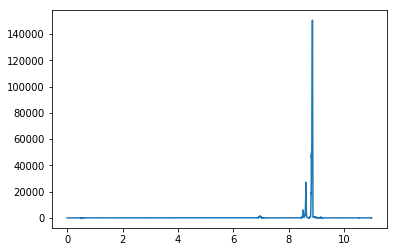

In [47]:
import numpy as np
from matplotlib import pyplot as plt
import peakutils
from peakutils.plot import plot as pplot
from scipy.signal import find_peaks_cwt
plt.clf()
no_of_bins = int((src_band_array.max()-src_band_array.min())*1000)
#plt.hist(src_band_array, bins = no_of_bins)
data,bins = np.histogram(src_band_array, bins = no_of_bins)
x = np.linspace(0, 11, no_of_bins)
y = data
plt.plot(x, y)
peaks = peakutils.peak.indexes(y, thres=500, min_dist=0.001)
indexes = find_peaks_cwt(y,np.arange(1,100))
print(peaks)
print(bins[indexes])
print(data[indexes])
xin = np.linspace(0, 11, len(data[indexes]))
#plt.scatter(xin,data[indexes], c='r')
plt.show()

In [12]:
import csv
import statistics
rng = 0.7
elevation = []
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    data = len(list(reader))
kmeans = KMeans(n_clusters = data).fit(src_band_array.reshape(-1,1))
cluster_center = np.array([x[0] for x in kmeans.cluster_centers_])
center_index = kmeans.predict(src_band_array.reshape(-1,1))
floor = cluster_center[statistics.mode(center_index)]

range_array = src_band_array[(src_band_array<=floor+rng) & (src_band_array>=floor-rng)]
kmeans_range = KMeans(n_clusters = data-2).fit(range_array.reshape(-1,1))
cluster_center_range = np.array([x[0] for x in kmeans_range.cluster_centers_])
elevation.extend(sorted(cluster_center_range.tolist()))
elevation.insert(0,floor-rng)
elevation.append(floor+rng)

import combine_hillshaded_colorized
import create_colorized_dem
import csv

arr = []
new_arr=[]
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
#print(arr)
x = len(elevation)
y = len(arr)/x
for i in range(x):
    j = int(y*i)
    arr[j].insert(0,elevation[i])
    new_arr.append(arr[j][:])
print(new_arr)
new_arr.append(['nv',000,000,000])

with open("/home/malavika/kmeans_21_clrspectrum.txt",'w') as csvfile:
    writer = csv.writer(csvfile, delimiter =' ')
    for ar in new_arr:
        writer.writerow(ar)
create_colorized_dem.createColorAndHSDems("/home/malavika/tharangini_formwork_09_27.tif", "/home/malavika/kmeans_21_clrspectrum.txt")

INFO:DEM Dir is /home/malavika, DEM File is tharangini_formwork_09_27.tif DEM Name without extension is tharangini_formwork_09_27


[[112.43359577865316, '0', '0', '0', ''], [112.52984362205672, '128', '0', '0'], [112.62098701233788, '160', '82', '45'], [112.65972394582506, '255', '0', '0'], [112.73533956056912, '255', '160', '122'], [112.78257602871213, '255', '140', '0'], [112.8051998790229, '218', '165', '32'], [112.85676755616679, '255', '255', '0'], [112.97177129469229, '154', '205', '50'], [113.05809571939511, '0', '255', '0'], [113.08195888300412, '0', '128', '0'], [113.10192513473491, '60', '179', '113'], [113.11661281365684, '102', '205', '170'], [113.12908836544167, '0', '255', '255'], [113.1411332597761, '0', '139', '139'], [113.21491756399818, '0', '0', '255'], [113.29755422699513, '0', '0', '128'], [113.41159338637688, '128', '0', '128'], [113.54532387698869, '199', '21', '133'], [113.66053950146623, '255', '0', '255'], [113.83359577865316, '0', '0', '0']]


INFO:Output colorized and hillshaded DEM is at - /home/malavika/tharangini_formwork_09_27-crhs.tif
INFO:Done


0 0


185.821685791
42.4747772217
143346
[ 101.18827765  159.21201191  114.76551646  127.74705789  106.4749072 ]


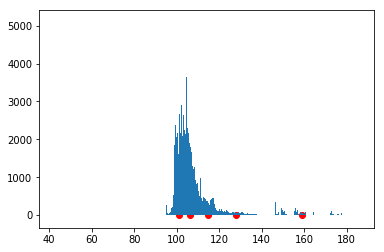

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
print(src_band_array.max())
print(src_band_array.min())
no_of_bins = int((src_band_array.max()-src_band_array.min())*1000)
print(no_of_bins)
kmeans = KMeans(n_clusters = 5).fit(src_band_array.reshape(-1,1))
cluster_center = np.array([x[0] for x in kmeans.cluster_centers_])
print(cluster_center)
plt.clf()
plt.hist(src_band_array, bins = no_of_bins)
y = np.zeros(5, dtype = int)
plt.scatter(cluster_center, y, c = 'r')
plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
import csv
import statistics
elevation = []
rng = 0.7
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    data = len(list(reader))
kmeans = MiniBatchKMeans(n_clusters = data, batch_size = 5000).fit(src_band_array.reshape(-1,1))
cluster_center = np.array([x[0] for x in kmeans.cluster_centers_])
center_index = kmeans.predict(src_band_array.reshape(-1,1))
floor = cluster_center[statistics.mode(center_index)]

range_array = src_band_array[(src_band_array<=floor+rng) & (src_band_array>=floor-rng)]
kmeans_range = MiniBatchKMeans(n_clusters = data-2, batch_size = 5000).fit(range_array.reshape(-1,1))
cluster_center_range = np.array([x[0] for x in kmeans_range.cluster_centers_])
elevation.extend(sorted(cluster_center_range.tolist()))
elevation.insert(0,floor-rng)
elevation.append(floor+rng)

import combine_hillshaded_colorized
import create_colorized_dem
import csv
elevation = sorted(cen)
elevation.insert(0,src_band_array.min())
elevation.append(src_band_array.max())

arr = []
new_arr=[]
with open("/home/malavika/clrspectrum.txt") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        arr.append(row)
#print(arr)
x = len(elevation)
y = len(arr)/x
for i in range(x):
    j = int(y*i)
    arr[j].insert(0,elevation[i])
    new_arr.append(arr[j][:])
print(new_arr)
new_arr.append(['nv',000,000,000])

with open("/home/malavika/minibatch_clrspectrum.txt",'w') as csvfile:
    writer = csv.writer(csvfile, delimiter =' ')
    for ar in new_arr:
        writer.writerow(ar)
create_colorized_dem.createColorAndHSDems("/home/malavika/tharangini_formwork_09_27.tif", "/home/malavika/minibatch_clrspectrum.txt")